## 1.このテキストについて


テキストの目的
実データに近いものの分析を行う
データセットに対して自ら課題を設定できるようにする

どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。


## 2.信用情報


Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

Home Credit Default Risk | Kaggle

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。


## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？

1. HomeCreditは、ノンバンクの金融企業。クライアントの返済能力を予測して、多くの人がローンを利用できるよう努めている。

2. 顧客のクレジット残高情報や未払い情報などを学習データとし、その顧客が返済能力があるか予測する。

3. 金融機関の利益の大半が利息のため、多くの人に貸せた方がよい。ただし、返済能力の低い(弁済不能になる可能性のある)人を予測することで、正確に多くの人に貸し出せることができる。返済能力がある程度ある人でも、いくらまで貸せそうかを予測できれば、適切な金額までを貸し出すことができる。また、その収益の予測にもつなげられそう。

### データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

Dataページ内の他のcsvファイルはこの課題では扱いません。


In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/home-credit-default-risk/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。

《推奨参考Notebooks》

Home Credit Default Risk Extensive EDA | Kaggle

HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle

HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle

この他タイトルにEDAと付いているものを参考にしてください。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

1. .head()、.info()、describe()などを使う
2. 欠損値の有無を見る
3. クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.shape

(307511, 122)

In [7]:
null = df.isnull().sum()
null[null > 0].sort_values()

DAYS_LAST_PHONE_CHANGE           1
CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
EXT_SOURCE_2                   660
                             ...  
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
Length: 67, dtype: int64

目的変数：TARGET

ターゲット変数（1-支払いが困難なクライアント：彼/彼女は、サンプルのローンの最初のY分割払いの少なくとも1つでX日を超えて支払いが遅れた、0-その他すべてのケース）

In [8]:
df_0 = df['TARGET'] == 0
df_1 = df['TARGET'] == 1

In [9]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

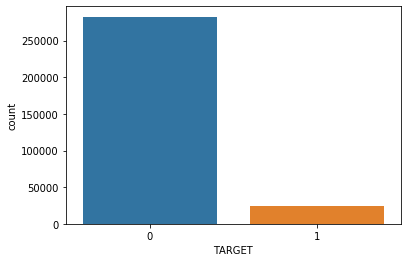

In [10]:
sns.countplot(df['TARGET'])
plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

1. データの種類を把握する必要がある。
2. 基本的な属性での傾向分析（性別・年代・年収・既婚/独身・職種）が必要。
3. 1で把握した内容に基づいて仮説を立てる
4. 目的変数と相関が高い変数を抽出する方法を検討する必要がある。
5. データ型の変換や欠損値の扱いについて検討する必要がある。

In [11]:
a = df.isnull().sum()
b = a[a==0]
df.loc[:, b.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [12]:
df2 = df.loc[:, b.index]

In [13]:
df_int = df2.select_dtypes(exclude=object)

In [14]:
df_int_corr = df_int.corr()

In [15]:
df_int_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,0.000849,-0.001500,0.001366,-0.000973,-0.000384,...,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.037227,0.078239,-0.044932,0.041975,0.051457,...,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,-0.025573,0.330938,-0.239818,0.183395,-0.028019,...,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.074796,0.027261,-0.064223,0.027805,0.008506,...,0.002540,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,-0.000589
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.099738,-0.055436,-0.066838,0.009621,-0.006575,...,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034329,0.021082,0.031023,-0.016148
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,...,-0.000404,0.031186,0.032202,0.009446,0.006313,0.007414,0.013367,0.002364,-0.000045,0.003437
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,-0.029582,1.000000,-0.615864,0.331912,0.272691,...,0.000236,0.026333,0.030733,0.012953,0.024044,0.007877,0.044498,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.003980,-0.615864,1.000000,-0.210242,-0.272378,...,-0.001225,-0.025778,-0.023383,-0.014285,-0.042905,-0.007187,-0.040396,-0.010040,-0.010135,-0.008396
DAYS_REGISTRATION,-0.000973,0.041975,0.183395,0.027805,0.009621,-0.053820,0.331912,-0.210242,1.000000,0.101896,...,0.001682,0.015470,0.011636,0.008195,0.025935,0.002102,0.017040,0.004764,0.006971,0.003859
DAYS_ID_PUBLISH,-0.000384,0.051457,-0.028019,0.008506,-0.006575,-0.003993,0.272691,-0.272378,0.101896,1.000000,...,-0.002193,0.003048,0.008710,0.000158,0.002782,0.004804,0.014084,0.000903,0.000070,0.017246


In [16]:
df_int_corr['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_MOBIL                     0.000534
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5               -0.000316
FLAG_DOCUMENT_12              -0.000756
FLAG_DOCUMENT_19              -0.001358
FLAG_DOCUMENT_10              -0.001414


DAYS_EMPLOYED	

How many days before the application the person started current employment	time only relative to the application	何日前に申請人は、現在の雇用を開始しました

In [19]:
# a1 = df['TARGET' == 0]['DAYS_EMPLOYED']
# a2 = df['TARGET' == 1]['DAYS_EMPLOYED']

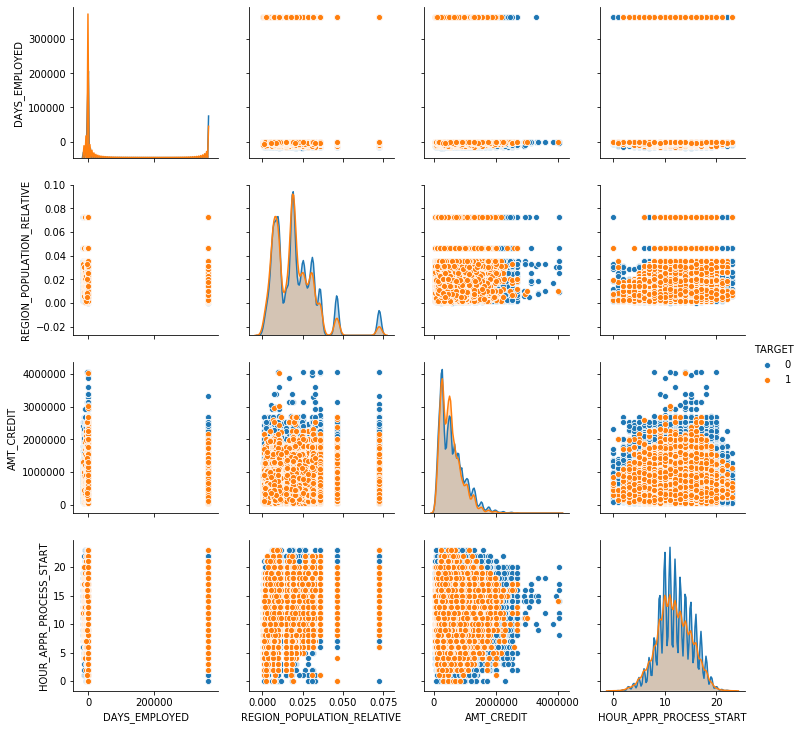

In [20]:
# df3 = df.loc[:, ['TARGET', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'FLAG_DOCUMENT_6']]
df3 = df.loc[:, ['TARGET', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START']]
sns.pairplot(df3, hue='TARGET')

In [21]:
df_obj = df2.select_dtypes(include=object)
df_obj['TARGET'] = df2.loc[:,'TARGET']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [23]:
gender_map = {'F':0 , 'M':1 , 'XNA':2}
df_obj['CODE_GENDER'] = df_obj['CODE_GENDER'].map(gender_map)
df_obj['CODE_GENDER']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1
1         0
2         1
3         0
4         1
         ..
307506    1
307507    0
307508    0
307509    0
307510    0
Name: CODE_GENDER, Length: 307511, dtype: int64

In [24]:
df_obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,TARGET
0,Cash loans,1,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3,1
1,Cash loans,0,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School,0
2,Revolving loans,1,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government,0
3,Cash loans,0,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3,0
4,Cash loans,1,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion,0


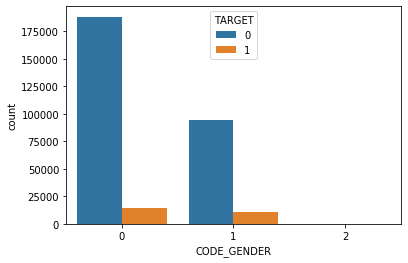

In [25]:
sns.countplot('CODE_GENDER', hue='TARGET', data=df_obj)

In [ ]:
sns.countplot()


1. データ理解して目的変数との傾向を分析する 
- データ理解・可視化して数値変換・欠損処理・正規化を行う。
- 目的変数との相関が高いものはないか？
- 説明変数同士で相関が高いものは？→次元削減するか？したらモデルの精度が上がるか？
- モデルに入れてみる









In [26]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_columns = df_int_corr['TARGET'].sort_values(ascending=False).head(10).index

In [31]:
df4 = df2.loc[:, df_columns]

TARGET


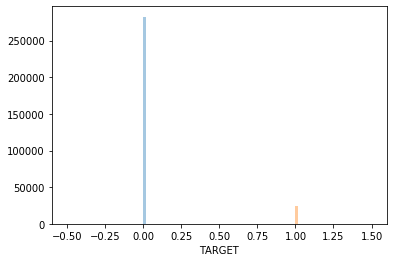

DAYS_BIRTH


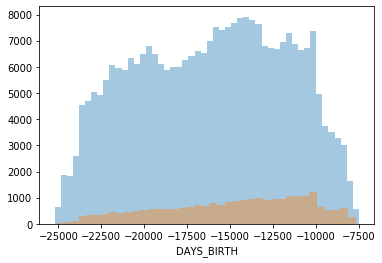

REGION_RATING_CLIENT_W_CITY


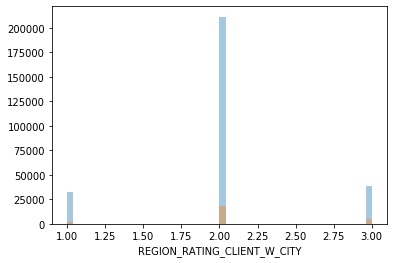

REGION_RATING_CLIENT


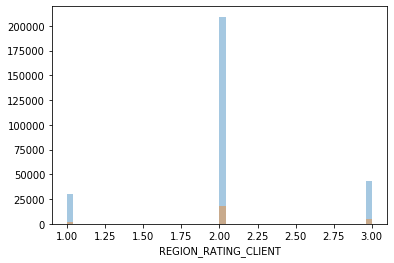

DAYS_ID_PUBLISH


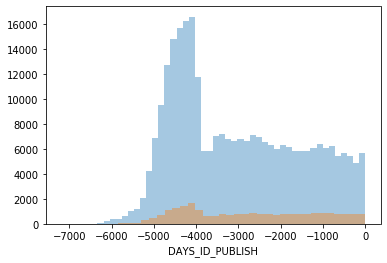

REG_CITY_NOT_WORK_CITY


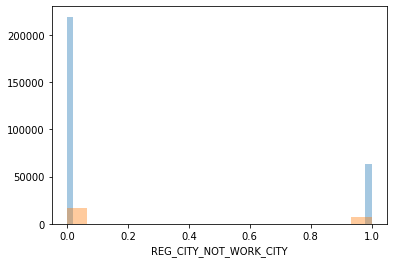

FLAG_EMP_PHONE


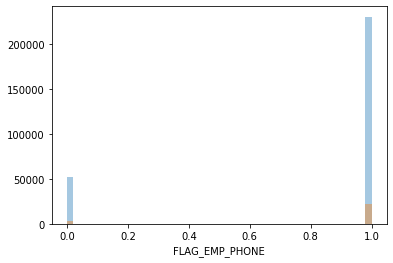

REG_CITY_NOT_LIVE_CITY


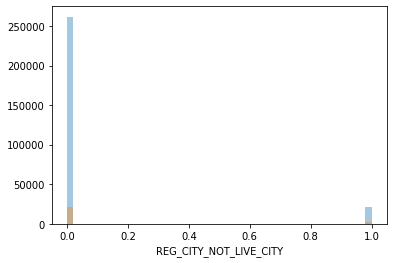

FLAG_DOCUMENT_3


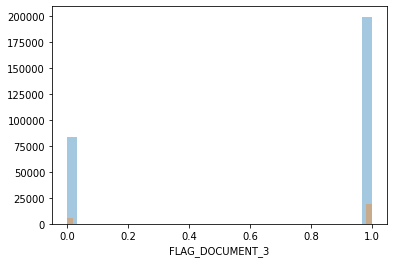

DAYS_REGISTRATION


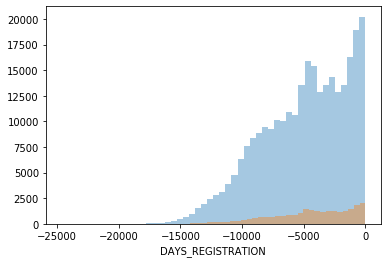

In [41]:
df4_0 = df4[df4['TARGET'] == 0]
df4_1 = df4[df4['TARGET'] == 1]

for i in df4_0.columns:
    print(i)
    sns.distplot(df4_0[i], kde=False)
    sns.distplot(df4_1[i], kde=False)
    plt.show()

DAYS_ID_PUBLISH、DAY_REGISTRATION